In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42 

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [3]:
import csv
# Read label file and set NUM_CLASSES automatically
with open('model/keypoint_classifier/keypoint_classifier_label.csv', encoding='utf-8-sig') as f:
    keypoint_labels = [row[0] for row in csv.reader(f) if row]
NUM_CLASSES = len(keypoint_labels)
print('Labels:', keypoint_labels)
print('NUM_CLASSES =', NUM_CLASSES)

Labels: ['Hello', 'Bye', 'I love you', 'Peace', 'like', 'dislike', 'Thank you', 'sorry', 'STOP', 'Yes', 'Please', 'No', 'Okay']
NUM_CLASSES = 13


In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
# Validate labels in dataset against label file
unique_labels = sorted(list(set(y_dataset.tolist())))
if len(unique_labels) == 0:
    raise ValueError('No labels found in dataset. Capture data first.')
if max(unique_labels) >= NUM_CLASSES:
    raise ValueError(f'NUM_CLASSES ({NUM_CLASSES}) must be greater than max label in dataset ({max(unique_labels)}).')
if len(unique_labels) != NUM_CLASSES:
    print('Warning: number of unique labels in dataset', len(unique_labels), '!= NUM_CLASSES', NUM_CLASSES)
print('Unique labels in dataset:', unique_labels)

Unique labels in dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 13)                143       
                                                                 
Total params: 1,213
Trainable params: 1,213
Non-trainable params: 0
_________________________________________________________________


In [10]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/12 [=>............................] - ETA: 13s - loss: 2.6399 - accuracy: 0.1406
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 2s 36ms/step - loss: 2.6253 - accuracy: 0.0950 - val_loss: 2.5579 - val_accuracy: 0.1571
Epoch 2/1000
 1/12 [=>............................] - ETA: 0s - loss: 2.6351 - accuracy: 0.1172
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 10ms/step - loss: 2.5747 - accuracy: 0.1082 - val_loss: 2.5293 - val_accuracy: 0.1730
Epoch 3/1000
 1/12 [=>............................] - ETA: 0s - loss: 2.5455 - accuracy: 0.1172
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 10ms/step - loss: 2.5373 - accuracy: 0.1129 - val_loss: 2.5029 - val_accuracy: 0.1750
Epoch 4/1000
 1/12 [=>............................] - ETA: 0s - loss: 2.4981 - accuracy: 0.15

In [13]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 5ms/step - loss: 0.3550 - accuracy: 0.9105


In [14]:
#
model = tf.keras.models.load_model(model_save_path)

In [15]:
#
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 174ms/step
[8.3310615e-12 1.3455718e-09 5.7432914e-08 7.2310854e-07 4.8674913e-03
 8.7150613e-07 2.2064705e-04 1.2753849e-01 4.6062490e-01 1.4615570e-04
 4.0660048e-01 1.3673808e-07 5.6201589e-12]
8


16/16 [==============================] - 0s 2ms/step


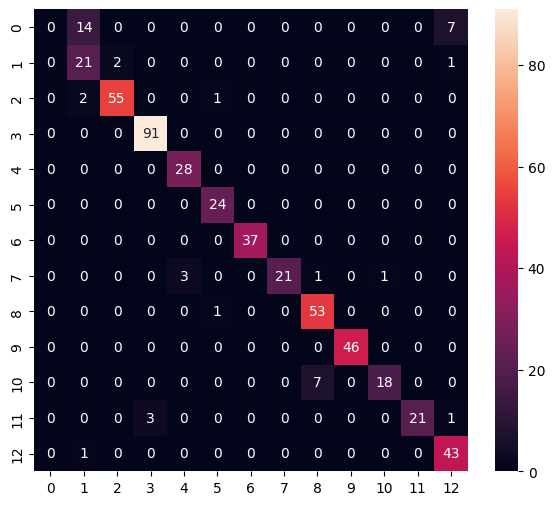

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.55      0.88      0.68        24
           2       0.96      0.95      0.96        58
           3       0.97      1.00      0.98        91
           4       0.90      1.00      0.95        28
           5       0.92      1.00      0.96        24
           6       1.00      1.00      1.00        37
           7       1.00      0.81      0.89        26
           8       0.87      0.98      0.92        54
           9       1.00      1.00      1.00        46
          10       0.95      0.72      0.82        25
          11       1.00      0.84      0.91        25
          12       0.83      0.98      0.90        44

    accuracy                           0.91       503
   macro avg       0.84      0.86      0.84       503
weighted avg       0.89      0.91      0.89       503



f:\maybe\Project\hand-gesture-recognition-mediapipe-main\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\maybe\Project\hand-gesture-recognition-mediapipe-main\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\maybe\Project\hand-gesture-recognition-mediapipe-main\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [17]:
model.save(model_save_path, include_optimizer=False)

In [18]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Youss\AppData\Local\Temp\tmp18vig0_w\assets


INFO:tensorflow:Assets written to: C:\Users\Youss\AppData\Local\Temp\tmp18vig0_w\assets


6956

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.3310771e-12 1.3455713e-09 5.7432842e-08 7.2310968e-07 4.8674997e-03
 8.7150596e-07 2.2064731e-04 1.2753852e-01 4.6062481e-01 1.4615594e-04
 4.0660056e-01 1.3673829e-07 5.6201576e-12]
8
